과제) 네이버 뉴스에서 본인이 선택한 검색어로 검색 한 결과를 json으로 저장 한 후    
1) 적절하지 않은 단어를 제거 한 후   
2) 단어 빈도수 기준으로 histogram 생성  
3) word cloud 생성.   

아래 code를 변형 하여 사용.   
가능 하면 본인의 client id와 client secret 사용 할 것. 2주차 과제에 업로드 된 code확인


In [1]:
import os
import sys
import urllib.request
import datetime
import time
import json


client_id = 'EjbHjpgKv0gwN1C05qn6'
client_secret = 'FDtN2OazP7'

out_file_name = 'task01.json'
out_folder_dir = '../json/'
full_dir = f'{out_folder_dir}{out_file_name}'


# [CODE 1]
def getRequestUrl(url):
	req = urllib.request.Request(url)
	req.add_header("X-Naver-Client-Id", client_id)
	req.add_header("X-Naver-Client-Secret", client_secret)

	try:
		response = urllib.request.urlopen(req)
		if response.getcode() == 200:
			print("[%s] Url Request Success" % datetime.datetime.now())
			return response.read().decode('utf-8')
	except Exception as e:
		print(e)
		print("[%s] Error for URL : %s" % (datetime.datetime.now(), url))
		return None


# [CODE 2]
def getNaverSearch(node, srcText, start, display):
	base = "https://openapi.naver.com/v1/search"
	node = "/%s.json" % node
	parameters = "?query=%s&start=%s&display=%s" % (urllib.parse.quote(srcText), start, display)

	url = base + node + parameters
	responseDecode = getRequestUrl(url)  # [CODE 1]

	if responseDecode is None:
		return None
	else:
		return json.loads(responseDecode)


# [CODE 3]
def getPostData(post, jsonResult, cnt):
	title = post['title']
	description = post['description']
	org_link = post['originallink']
	link = post['link']

	pDate = datetime.datetime.strptime(post['pubDate'], '%a, %d %b %Y %H:%M:%S +0900')
	pDate = pDate.strftime('%Y-%m-%d %H:%M:%S')

	jsonResult.append({'cnt': cnt, 'title': title, 'description': description, 'org_link': org_link, 'link': org_link, 'pDate': pDate})
	return


# [CODE 0]
def main():
	node = 'news'  # 크롤링 할 대상
	srcText = input('검색어를 입력하세요: ')
	cnt = 0
	jsonResult = []

	jsonResponse = getNaverSearch(node, srcText, 1, 100)
	total = jsonResponse['total']

	while (jsonResponse is not None) and (jsonResponse['display'] != 0):
		for post in jsonResponse['items']:
			cnt += 1
			getPostData(post, jsonResult, cnt)

		start = jsonResponse['start'] + jsonResponse['display']
		jsonResponse = getNaverSearch(node, srcText, start, 100)

	print('전체 검색 : %d 건' % total)

	with open(f'{full_dir}', 'w', encoding='utf8') as outfile:
		jsonFile = json.dumps(jsonResult, indent=4, sort_keys=True, ensure_ascii=False)

		outfile.write(jsonFile)

	print("가져온 데이터: %d 건" % cnt)
	print(f'{out_file_name} SAVED')


if __name__ == '__main__':
	main()



[2022-12-05 23:18:49.376139] Url Request Success
[2022-12-05 23:18:49.558305] Url Request Success
[2022-12-05 23:18:49.713445] Url Request Success
[2022-12-05 23:18:49.911625] Url Request Success
[2022-12-05 23:18:50.129824] Url Request Success
[2022-12-05 23:18:50.326001] Url Request Success
[2022-12-05 23:18:50.516174] Url Request Success
[2022-12-05 23:18:50.766402] Url Request Success
[2022-12-05 23:18:50.965583] Url Request Success
[2022-12-05 23:18:51.143745] Url Request Success
HTTP Error 400: Bad Request
[2022-12-05 23:18:51.191789] Error for URL : https://openapi.naver.com/v1/search/news.json?query=%EC%86%90%ED%9D%A5%EB%AF%BC&start=1001&display=100
전체 검색 : 509291 건
가져온 데이터: 1000 건
task01.json SAVED


In [2]:
#  폰트 설치
import matplotlib.font_manager as fm

!apt-get -qq -y install fonts-nanum > /dev/null
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
fm._rebuild()

In [ ]:
#런타임 재시작
import os
os.kill(os.getpid(), 9)

In [1]:
#  폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False
	
# 한글 폰트 설정
path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
font_name = fm.FontProperties(fname=path, size=18).get_name()
plt.rc('font', family=font_name)
fm._rebuild()

In [2]:
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:8 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:13 http://security.ubuntu.com/ubuntu 

In [ ]:
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


# 8장. 텍스트빈도분석 - 2) 한글 단어 분석 

## 한글 단어 분석을 위한 패키지 준비

In [4]:
import json
import re

import matplotlib.font_manager as fm

from konlpy.tag import Okt

from collections import Counter

import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 1. 데이터 준비

### 1-1. 파일 읽기

In [2]:
inputFileName = '../json/task01'
data = json.loads(open(inputFileName + '.json', 'r', encoding='utf-8').read())
print(f'data: {data}')

data: [{'cnt': 1, 'description': '예선 3경기에서 마스크를 쓰고 모두 풀타임을 뛴 주장 <b>손흥민</b> 선수 많이 힘들 텐데요. 변함없이 밝은 표정으로 훈련에 임했습니다. 포르투갈전을 마치고 사흘 만에 16강전을 치러야 하기 때문에 역시 체력이 가장 큰... ', 'link': 'https://www.ytn.co.kr/_ln/0107_202212052309362661', 'org_link': 'https://www.ytn.co.kr/_ln/0107_202212052309362661', 'pDate': '2022-12-05 23:09:00', 'title': '네이마르 나와라!...축구대표팀, 내일 새벽 브라질과 16강전'}, {'cnt': 2, 'description': '다만 넥슨은 김민재, <b>손흥민</b>, 이강인 선수를 기용했을 시 승률이 높아져 <b>손흥민</b>의 활약과 김민재의 출전 여부, 이강인의 선발 여부가 승리에 핵심 요인이 될 것으로 봤다. 브라질은 월드클래스 네이마르와 핵심 수비진... ', 'link': 'http://www.whitepaper.co.kr/news/articleView.html?idxno=221653', 'org_link': 'http://www.whitepaper.co.kr/news/articleView.html?idxno=221653', 'pDate': '2022-12-05 23:08:00', 'title': '넥슨 &quot;16강전, 한국이 브라질 이길 확률 28%&quot;'}, {'cnt': 3, 'description': '<b>손흥민</b>의 동료 페리시치가 크라마리치와 함께 측면 공략에 나서며 모드리치, 코바치치, 브로조비치로 이어지는 꿈의 중원이 일본과 중원싸움을 펼친다. 특히 작은 정우영(프라이브루크)의 동료인 도안 리츠와 <b>손흥민</b>... ', 'link': 'https://www.xportsnews.com/article/1662374', 'org_link': 

### 1-2. 분석할 데이터 추출

In [5]:
message = ''

for item in data:
	if 'description' in item.keys():
		message = message + re.sub(r'[^\w]', ' ', item['description']) + ''

print(f'message: {message}')

message: 예선 3경기에서 마스크를 쓰고 모두 풀타임을 뛴 주장  b 손흥민  b  선수 많이 힘들 텐데요  변함없이 밝은 표정으로 훈련에 임했습니다  포르투갈전을 마치고 사흘 만에 16강전을 치러야 하기 때문에 역시 체력이 가장 큰    다만 넥슨은 김민재   b 손흥민  b   이강인 선수를 기용했을 시 승률이 높아져  b 손흥민  b 의 활약과 김민재의 출전 여부  이강인의 선발 여부가 승리에 핵심 요인이 될 것으로 봤다  브라질은 월드클래스 네이마르와 핵심 수비진     b 손흥민  b 의 동료 페리시치가 크라마리치와 함께 측면 공략에 나서며 모드리치  코바치치  브로조비치로 이어지는 꿈의 중원이 일본과 중원싸움을 펼친다  특히 작은 정우영 프라이브루크 의 동료인 도안 리츠와  b 손흥민  b     조규성을 최전방에 배치하고 2선에  b 손흥민  b   이강인  황희찬이 이름을 올렸다  현재 황희찬은 햄스트링 부상에서 완벽히 회복되지 않아 선발 출전 여부는 미지수다  3선에는 황인범과 정우영 알 사드 였다   apos 디 애슬래틱 apos 은     b 손흥민  b  토트넘 과 함께 한국 축구의  apos 두 얼굴 apos 로 자리매김했다  카타르에선 투혼이다  나폴리에서 살인적인 일정을 소화하면서 오른쪽 종아리 근육이 불편했다  월드컵 기간 중 끝내  apos 고장 apos 났다  그는 우루과이와의    공격의 중심에는  b 손흥민  b 이 나설 전망이다  전 세계 내로라하는 선수들이 있는 영국 프리미어리그에서 무려 시즌 득점왕이었던  b 손흥민  b 은  슈퍼스타  네이마르와 견줘도 뒤처지지 않는 실력을 자랑한다  얼굴 골절    처음으로  b 손흥민  b   김민재  황희찬이 모두 포함된 최정예 멤버를 출격시킬 수 있을 것 quot 이라고 내다봤다  SBS    브라질에 공격적인 선수들이 많기 때문에 선수들이 공격 진영으로 많이 올라올 때  b 손흥민  b  황희찬 선수의    주장  b 손흥민  b 이 브라질전 승리를 위해 앞장 선다  한

### 1-3. 품사 태깅 : 명사 추출

In [6]:
nlp = Okt()
message_N = nlp.nouns(message)
print(f'message_N: {message_N}')

message_N: ['예선', '경기', '마스크', '모두', '풀타임', '주장', '손흥민', '선수', '표정', '훈련', '임', '포르투갈', '전', '마치', '사흘', '강전', '때문', '역시', '체력', '가장', '다만', '넥슨', '김민재', '손흥민', '이강인', '선수', '기용', '시', '승률', '손흥민', '의', '활약', '김민재', '출전', '여부', '이강인', '선발', '여부', '승리', '핵심', '요인', '것', '브라질', '월드', '클래스', '네이마르', '핵심', '수비', '진', '손흥민', '의', '동료', '페리', '치가', '라마', '리치', '측면', '공략', '모드리치', '코바', '치치', '브로', '비치', '꿈', '중원', '일본', '중원', '싸움', '정우영', '프라', '이브', '루크', '의', '동료', '도안', '리츠', '손흥민', '규', '최', '전방', '배치', '선', '손흥민', '이강인', '황희', '찬', '이름', '현재', '황희', '찬', '햄스트링', '부상', '회복', '선발', '출전', '여부', '미지수', '선', '황인', '범과', '정우영', '알', '사드', '디', '애슬래틱', '은', '손흥민', '토트넘', '과', '한국', '축구', '두', '얼굴', '로', '김', '카타르', '투혼', '나폴리', '살인', '일정', '소화', '오른쪽', '종아리', '근육', '월드컵', '기간', '중', '끝내', '고장', '그', '우루과이', '공격', '중심', '손흥민', '이', '전망', '전', '세계', '로라', '선수', '영국', '프리미어리그', '무려', '시즌', '득점', '손흥민', '은', '슈퍼스타', '네이마르', '견줘', '뒤', '처지', '실력', '자랑', '얼굴', '골절', '처음', '손흥민', '김민재', '황희', '찬', '모

## 2. 데이터 탐색

### 2-1. 단어 빈도 탐색

In [7]:
count = Counter(message_N)

print(f'count: {count}')

count: Counter({'손흥민': 1707, '선수': 584, '한국': 504, '이': 424, '황희': 336, '찬': 335, '의': 331, '토트넘': 314, '브라질': 310, '월드컵': 260, '축구': 239, '전': 237, '포르투갈': 230, '은': 225, '경기': 224, '대표팀': 218, '골': 198, '과': 197, '강': 196, '주장': 174, '이강인': 169, '것': 154, '카타르': 149, '패스': 148, '시간': 138, '김민재': 135, '등': 132, '팀': 124, '감독': 116, '대한민국': 112, '수': 108, '리그': 104, '네이마르': 101, '공격': 101, '그': 99, '지난': 96, '진출': 95, '투': 93, '어시스트': 89, '부상': 86, '출전': 84, '이번': 80, '사진': 79, '규': 78, '후반': 77, '로': 75, '우리': 73, '마스크': 70, '위': 69, '황인': 67, '동료': 66, '때': 65, '수비': 64, '득점': 64, '캡틴': 63, '잉글랜드': 62, '강전': 60, '범': 60, '활약': 59, '매체': 59, '승리': 57, '역습': 56, '추가': 55, '고': 54, '결승골': 54, '영국': 52, '역전': 52, '홋스퍼': 52, '파울루': 51, '두': 50, '대회': 49, '스포츠': 49, '상대': 49, '케인': 49, '가장': 47, '일본': 47, '여부': 46, '대결': 46, '모두': 45, '기록': 45, '베스트': 45, '세계': 44, '모습': 44, '며': 43, '최': 42, '뒤': 42, '공격수': 42, '자신': 42, '팬': 42, '말': 42, '때문': 41, '히샬리송': 41, '박지성': 41, '또': 41, '질주': 41

In [8]:
word_count = dict()

for tag, counts in count.most_common(80)[5:-1]: # 쓸모 없는 키워드 삭제
	if len(str(tag)) > 1:
		word_count[tag] = counts
		print("%s : %d" % (tag, counts))

토트넘 : 314
브라질 : 310
월드컵 : 260
축구 : 239
포르투갈 : 230
경기 : 224
대표팀 : 218
주장 : 174
이강인 : 169
카타르 : 149
패스 : 148
시간 : 138
김민재 : 135
감독 : 116
대한민국 : 112
리그 : 104
네이마르 : 101
공격 : 101
지난 : 96
진출 : 95
어시스트 : 89
부상 : 86
출전 : 84
이번 : 80
사진 : 79
후반 : 77
우리 : 73
마스크 : 70
황인 : 67
동료 : 66
수비 : 64
득점 : 64
캡틴 : 63
잉글랜드 : 62
강전 : 60
활약 : 59
매체 : 59
승리 : 57
역습 : 56
추가 : 55
결승골 : 54
영국 : 52
역전 : 52
홋스퍼 : 52
파울루 : 51
대회 : 49
스포츠 : 49
상대 : 49
케인 : 49
가장 : 47
일본 : 47
여부 : 46
대결 : 46
모두 : 45


In [12]:
print(word_count)

{'손흥민': 1527, '훈련': 585, '카타르': 568, '축구': 485, '월드컵': 431, '대표팀': 411, '토트넘': 369, '선수': 348, '도하': 340, '시간': 307, '한국': 290, '현지': 256, '대한민국': 216, '마스크': 200, '경기': 179, '오후': 176, '감독': 165, '센터': 151, '트레이닝': 146, '부상': 137, '뉴스': 126, '골절': 115, '주장': 111, '파울루': 98, '출전': 97, '수술': 93, '황희': 90, '홋스퍼': 86, '국가대표팀': 80, '김민재': 79, '사인': 76, '가장': 75, '가나': 75, '상태': 74, '언론': 74, '투호': 70, '연맹': 69, '뉴시스': 68, '여러분': 65, '우루과이': 64, '캡틴': 64, '공감': 64, '독자': 64, '제보': 62, '오전': 61, '김진수': 61, '유니폼': 59, '소화': 57, '지난': 57, '득점': 56, '회복': 55, '에이스': 54, '착용': 53}


In [13]:
# 대신 In8에 코드 추가


In [14]:
print(word_count)

{'훈련': 585, '카타르': 568, '축구': 485, '월드컵': 431, '대표팀': 411, '토트넘': 369, '선수': 348, '도하': 340, '시간': 307, '한국': 290, '현지': 256, '마스크': 200, '경기': 179, '오후': 176, '감독': 165, '센터': 151, '트레이닝': 146, '부상': 137, '뉴스': 126, '골절': 115, '주장': 111, '파울루': 98, '출전': 97, '수술': 93, '황희': 90, '홋스퍼': 86, '국가대표팀': 80, '김민재': 79, '사인': 76, '가장': 75, '가나': 75, '상태': 74, '언론': 74, '투호': 70, '연맹': 69, '뉴시스': 68, '여러분': 65, '우루과이': 64, '캡틴': 64, '공감': 64, '독자': 64, '제보': 62, '오전': 61, '김진수': 61, '유니폼': 59, '소화': 57, '지난': 57, '득점': 56, '회복': 55, '에이스': 54, '착용': 53}


### 히스토그램

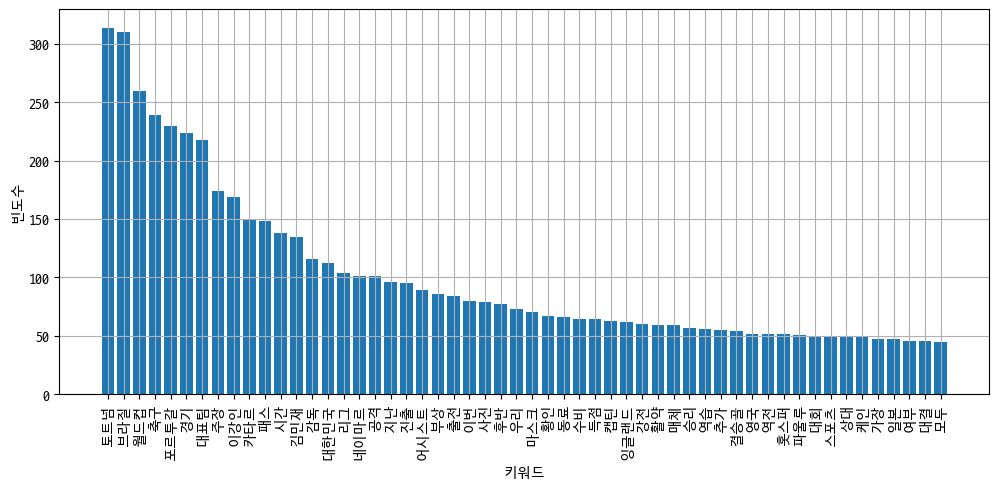

In [9]:
font_path = '../../font/d2coding.ttc'
fontprop = fm.FontProperties(fname=font_path, size=15)

plt.rc('font', family=fontprop.get_name())

plt.figure(figsize=(12, 5))
plt.xlabel('키워드')
plt.ylabel('빈도수')
plt.grid(True)

sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)

plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation=90)

plt.show()

### 워드클라우드

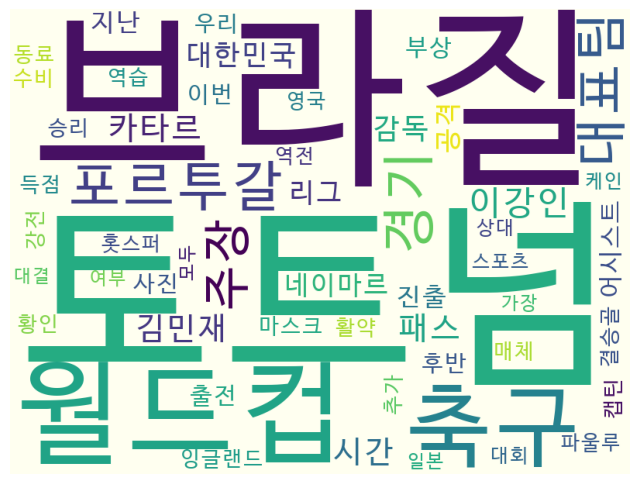

In [10]:
wc = WordCloud(font_path, background_color='ivory', width=800, height=600)
cloud = wc.generate_from_frequencies(word_count)

plt.figure(figsize=(8, 8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [12]:
cloud.to_file('task01.jpg')